# Triplet example
This triplet design, used in Jose Sasian’s [Lens Design OPTI 517](https://wp.optics.arizona.edu/jsasian/courses/opti-517/) course at the Univ. of Arizona, is attributed to Geiser.

In [1]:
%matplotlib inline
isdark = False

## Setup the rayoptics environment
The environment.py module imports many useful classes and functions. All the symbols defined in the module are intended to be imported into a rayoptics interactive session.

In [2]:
from rayoptics.environment import *

## Create a new model
Create a new OpticalModel instance and set up some convenient aliases to important constituents of the model.

In [3]:
opm = OpticalModel()            # initializes a new instance of the OpticalModel class.
sm  = opm['seq_model']          # sequence model describes the layout of the optical system, including the order of surfaces (lenses, mirrors, etc.) that light rays pass through.
osp = opm['optical_spec']       # contain critical parameters such as wavelength settings (like WvlSpec), field of view (FieldSpec), and pupil specifications (PupilSpec), which define how the system interacts with light.
pm = opm['parax_model']         # represents a simplified version of the optical system that uses paraxial ray tracing (small-angle approximations) to analyze first-order properties, like focal lengths, image positions, and magnifications.
em = opm['ele_model']           # organizes the optical system into optical elements, such as lenses, mirrors, and other components. This model helps represent the physical components of the system rather than just the sequence of surfaces.
# pt = opm['part_tree']         # Not used. organizes the physical structure of the optical system in a hierarchical manner.
ar = opm['analysis_results']    # contains the results of optical performance analyses, such as spot diagrams, ray aberrations, or other metrics that assess how well the system performs.

### Define first order aperture and field for system
The pupil and field specifications can be specified in a variety of ways. The key keyword argument takes a list of 2 strings. The first string indicates whether the specification is in object or image space. The second one indicates which parameter is the defining specification.

The PupilSpec can be defined in object or image space. The defining parameters can be epd, f/# or NA, where epd is the pupil diameter.

In [4]:
# Defines the aperture (or pupil) specifications for the optical system.
osp['pupil'] = PupilSpec(osp, key=['object',    # pupil is defined relative to the "object" side of the optical system.
                                   'epd'],      # pupil is being defined based on the entrance pupil diameter in object space.
                                   value=12.5)  # entrance pupil diameter (in millimeters).

The FieldSpec can be defined in object or image space. The defining parameters can be height or angle, where angle is given in degrees. The is_relative keyword argument may be used to specify fields as a fraction of the maximum value

In [5]:
# Defines the field of view (FOV) and related parameters for the optical system.
osp['fov'] = FieldSpec(osp, key=['object', 'angle'],    # specifies how the field of view is being defined. In that case, as an angle in degree.
                       value=20.0,                      # sets the field of view.
                       # flds=[0., 0.707, 1.],          # defines a list of field points in percentage of full field of view.
                       flds=[1.],                       # defines a list of field points in percentage of full field of view.
                       is_relative=True)                # indicates that the field angles are relative to the specified field of view (20 degrees in this case).

The WvlSpec defines the wavelengths and weights to use when evaluating the model. The wavelength values can be given in either nanometers or a spectral line designation.

In [6]:
# Defines spectral regions
osp['wvls'] = WvlSpec([('F', 0.5),              # Fraunhofer F line (486.13 nm), weight of 50%.
                       (587.5618, 1.0),         # Yellow-green region of the spectrum.
                       ('C', 0.5)],             # Fraunhofer C line (656.28 nm), weight of 50%.
                       ref_wl=1)

### Define interface and gap data for the sequential model

In [7]:
opm.radius_mode = True      # surface is defined directly using the radius of curvature.

sm.gaps[0].thi=1e10         # thickness (thi) of the first gap in the sequence model (sm) to a very large value (1e10). Assuming air or vacuum.
                            # This will cause the chief rays and marginal rays to appear coming from different source, but t

# From left to right
sm.add_surface([23.713, 4.831, 'N-LAK9', 'Schott']) # radius of curvature of the surface (in mm), positive radius means convex. N-LAK9 is a type of optical glass from Schott.
sm.add_surface([7331.288, 5.86])                    # radius of curvature of the other side of N-LAK9 material.
sm.add_surface([-24.456, .975, 'N-SF5,Schott'])     # concave surface. N-SF5 is another type of optical glass from the Schott catalog.
sm.set_stop()                                       # Sets the current surface as the aperture stop, controlling which rays can enter the system based on their angle and the aperture size.
sm.add_surface([21.896, 4.822])
sm.add_surface([86.759, 3.127, 'N-LAK9', 'Schott'])
sm.add_surface([-20.4942, 41.2365])

# Each optical element, especially the aperture stop (and sometimes other lens elements), is effectively "sized" or positioned to ensure that the light from the defined field points passes through the system.

### Update the model

In [8]:
opm.update_model()

### List the sequential model

In [9]:
sm.list_model()

              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  3.6397e+09
    1:    23.713000      4.83100    N-LAK9             1      10.009
    2:  7331.288000      5.86000       air             1      8.9482
 Stop:   -24.456000     0.975000     N-SF5             1      4.6641
    4:    21.896000      4.82200       air             1      4.6611
    5:    86.759000      3.12700    N-LAK9             1      8.0217
    6:   -20.494200      41.2365       air             1      8.3321
  Img:     0.000000      0.00000                       1      18.217


## Draw a lens picture

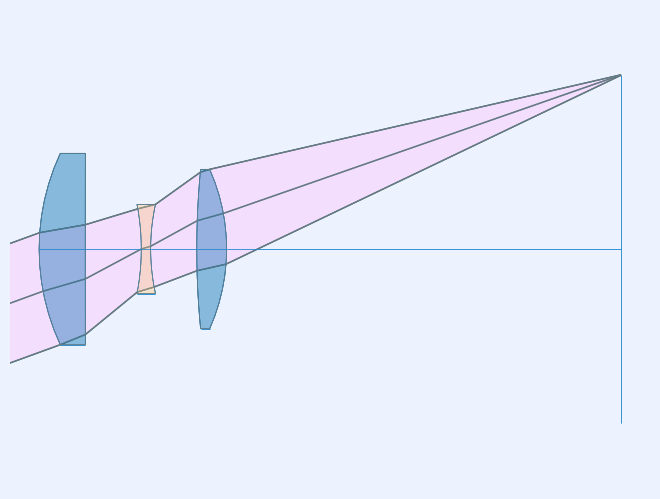

In [10]:
# Light travels from left (object) to right forming an image.
# The object (point source) is set at inifinity, causing all rays entering the lens to be collimated.
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, is_dark=isdark).plot()
plt.show()

In [11]:
# outputs a list of all the elements in the optical system.
em.list_model()

# Element Type: Whether the element is a lens, mirror, or aperture.
# Surface Data: It might list the surfaces that make up the element, including their curvature, thickness, and material. c is curvature as in 1/radius. t is thickness in mm. sd is semi-diameter in mm.
# Material: For each lens or element, it will specify the optical material, such as N-LAK9 or N-SF5.
# Distances/Gaps: It can include the thickness (distance between surfaces) or gaps in the system.

0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: E1 (Element): Element: Spherical(c=0.042170961076202926), Spherical(c=0.00013640168003221264), t=4.8310, sd=10.0087, glass: N-LAK9
2: E2 (Element): Element: Spherical(c=-0.04088976120379457), Spherical(c=0.04567044208987943), t=0.9750, sd=4.6641, glass: N-SF5
3: E3 (Element): Element: Spherical(c=0.011526181721781025), Spherical(c=-0.04879429301948844), t=3.1270, sd=8.3321, glass: N-LAK9
4: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [12]:
# outputs a summary of the key paraxial elements of the system, such as the focal points, principal planes, and image distances.
pm.list_model()

# Each row corresponds to a specific surface in the optical system, including some "dummy" surfaces (which may represent object and image planes).
# ax_ht (Axial Height), distance from the center of the optical system (the axis) to the ray at each surface.
# pr_ht (Paraxial Height), indicating how high above the optical axis the ray is at each surface.
# ax_slp (Axial Slope), angle of the ray with respect to the optical axis at each surface.
# pr_slp (Paraxial Slope), shows how much the ray is bending or changing direction at that surface.
# power, represents the optical power at the surface, which is the ability of that surface to converge or diverge rays.
# tau, spacing between the surfaces or optical elements, similar to the physical thickness of a lens or air gap.
# index, refractive index of the medium or material at that surface.
# type, type of interaction that occurs at the surface.

           ax_ht        pr_ht       ax_slp       pr_slp         power          tau        index    type
 0:            0  -3.6397e+09     6.25e-10      0.36397             0        1e+10      1.00000    dummy
 1:         6.25     -4.25088    -0.182126     0.487842    0.02914022      2.85689      1.69100    transmit
 2:      5.72969     -2.85718    -0.181586     0.487573 -9.425384e-05         5.86      1.00000    transmit
 3:      4.66559  3.53405e-07   -0.0532508     0.487573   -0.02750683     0.582887      1.67271    transmit
 4:      4.63455       0.2842    0.0891357     0.496304   -0.03072283        4.822      1.00000    transmit
 5:      5.06436      2.67738       0.0488      0.47498   0.007964615       1.8492      1.69100    transmit
 6:       5.1546      3.55571    -0.124998     0.355092    0.03371696      41.2365      1.00000    transmit
 7:  0.000143648      18.1985    -0.124998     0.355092             0            0      1.00000    dummy


## Draw a y -y/ diagram

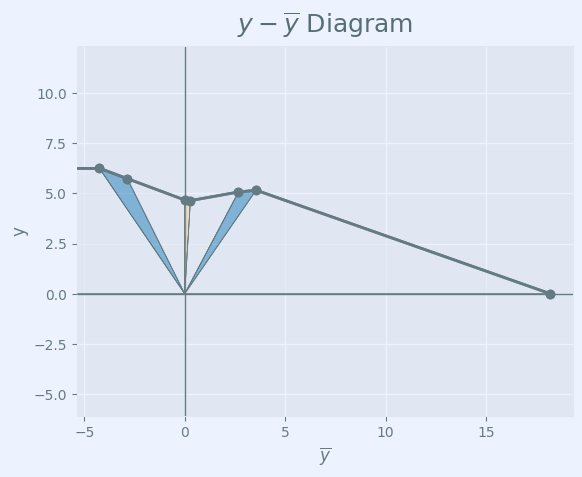

In [13]:
# graphical representation used in optics to describe the height of a ray at various surfaces of an optical system.
yybar_plt = plt.figure(FigureClass=InteractiveDiagram, opt_model=opm, dgm_type='ht',
                       do_draw_axes=True, do_draw_frame=True, is_dark=isdark).plot()
plt.show()

# dgm_type='ht': shows ray heights and how they change as light passes through the optical system.

## Plot the transverse ray aberrations

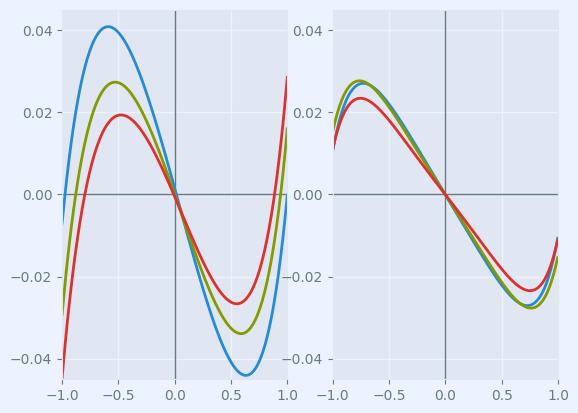

In [14]:
# generates a ray fan plot, useful for showing ray aberrations.
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()
plt.show()

# 

## Plot the wavefront aberration

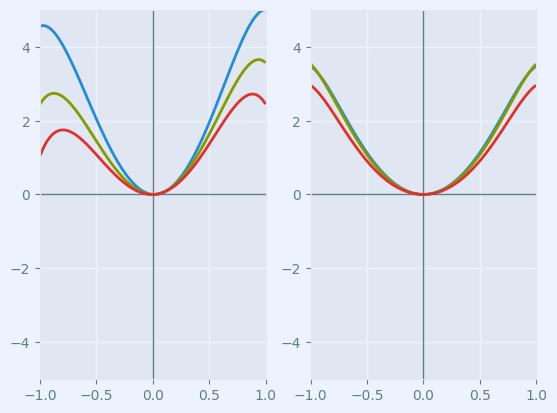

In [15]:
# generates an Optical Path Difference (OPD) plot.
wav_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()
plt.show()

## List the optical specifications

In [16]:
pm.first_order_data()

efl                  50
f                    50
f'                   50
ffl               -37.1
pp1                12.9
bfl               41.24
ppk              -8.763
pp sep           -2.047
f/#                   4
m                -5e-09
red              -2e+08
obj_dist          1e+10
obj_ang              20
enp_dist          11.68
enp_radius         6.25
na obj         6.25e-10
n obj                 1
img_dist          41.24
img_ht             18.2
exp_dist         -10.01
exp_radius        6.406
na img           -0.125
n img                 1
optical invariant        2.275


## List the paraxial model

In [17]:
pm.list_model()

           ax_ht        pr_ht       ax_slp       pr_slp         power          tau        index    type
 0:            0  -3.6397e+09     6.25e-10      0.36397             0        1e+10      1.00000    dummy
 1:         6.25     -4.25088    -0.182126     0.487842    0.02914022      2.85689      1.69100    transmit
 2:      5.72969     -2.85718    -0.181586     0.487573 -9.425384e-05         5.86      1.00000    transmit
 3:      4.66559  3.53405e-07   -0.0532508     0.487573   -0.02750683     0.582887      1.67271    transmit
 4:      4.63455       0.2842    0.0891357     0.496304   -0.03072283        4.822      1.00000    transmit
 5:      5.06436      2.67738       0.0488      0.47498   0.007964615       1.8492      1.69100    transmit
 6:       5.1546      3.55571    -0.124998     0.355092    0.03371696      41.2365      1.00000    transmit
 7:  0.000143648      18.1985    -0.124998     0.355092             0            0      1.00000    dummy


In [18]:
pm.list_lens()

       ax_ray_ht    ax_ray_slp
 0:            0      6.25e-10
 1:         6.25     -0.182126
 2:      5.72969     -0.181586
 3:      4.66559    -0.0532508
 4:      4.63455     0.0891357
 5:      5.06436        0.0488
 6:       5.1546     -0.124998
 7:  0.000143648     -0.124998

       pr_ray_ht    pr_ray_slp
 0:  -3.6397e+09       0.36397
 1:     -4.25088      0.487842
 2:     -2.85718      0.487573
 3:  3.53405e-07      0.487573
 4:       0.2842      0.496304
 5:      2.67738       0.47498
 6:      3.55571      0.355092
 7:      18.1985      0.355092

            power           tau        index    type
 0:             0         1e+10      1.00000    dummy
 1:    0.02914022        2.8569      1.69100    transmit
 2: -9.425384e-05          5.86      1.00000    transmit
 3:   -0.02750683       0.58289      1.67271    transmit
 4:   -0.03072283         4.822      1.00000    transmit
 5:   0.007964615        1.8492      1.69100    transmit
 6:    0.03371696        41.236      1.00000    

## Third Order Seidel aberrations

### Computation and tabular display

In [19]:
to_pkg = compute_third_order(opm)
to_pkg

,S-I,S-II,S-III,S-IV,S-V
1,0.027654,0.019379,0.013581,0.089174,0.072010
2,0.022082,-0.059501,0.160327,-0.000288,-0.431229
3,-0.105156,0.137692,-0.180295,-0.085097,0.347506
4,-0.045358,-0.076796,-0.130024,-0.095046,-0.381069
5,0.007942,0.028382,0.101431,0.024373,0.449596
6,0.103810,-0.050068,0.024148,0.103180,-0.061411
sum,0.010973,-0.000912,-0.010832,0.036297,-0.004597


### Bar chart for surface by surface third order aberrations

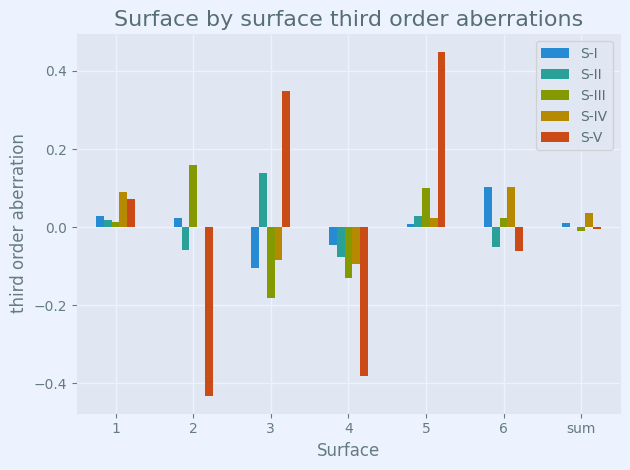

In [20]:
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
to_pkg.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()
plt.show()

### convert aberration sums to transverse measure

In [21]:
ax_ray, pr_ray, fod = ar['parax_data']
n_last = pm.sys[-1][mc.indx]
u_last = ax_ray[-1][mc.slp]
to.seidel_to_transverse_aberration(to_pkg.loc['sum',:], n_last, u_last)

TSA   -0.043893
TCO    0.010944
TAS   -0.015198
SAS   -0.101860
PTB   -0.145190
DST    0.018387
dtype: float64

### convert sums to wavefront measure

In [22]:
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
to.seidel_to_wavefront(to_pkg.loc['sum',:], central_wv).T

W040     2.334457
W131    -0.776108
W222    -9.218154
W220    10.834770
W311    -3.911650
dtype: float64

### compute Petzval, sagittal and tangential field curvature

In [23]:
to.seidel_to_field_curv(to_pkg.loc['sum',:], n_last, fod.opt_inv)

TCV    0.000734
SCV    0.004921
PCV    0.007014
dtype: float64

## Save the model

In [24]:
opm.save_model('Sasian Triplet')